In [1]:
import numpy as np
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import parse_records as pr
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [2]:
c_labels = np.array([i for i in range(0,10)])
def plot_with_labels(lowDWeights, labels, filename='tsne.png'):
    assert lowDWeights.shape[0] >= len(labels), "More labels than weights"
    plt.figure(figsize=(10, 10))  #in inches
    for i, label in enumerate(labels):
        x, y = lowDWeights[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom'
                )

    plt.savefig(filename)

In [3]:
import tensorflow as tf
mnist = tf.contrib.learn.datasets.load_dataset("mnist")

Instructions for updating:
Please use tf.data.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
mnist.test.labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# Attempt to project just 1 image

In [5]:
weights = pr.parse_all()[0]

In [6]:
weights[:10]

[array([ -7.01298952,  -5.67907   ,   3.33763242,   0.23764564,
        -13.9603891 ,  -6.1981225 , -13.5267439 ,  15.6025629 ,
         -1.98131216,  -0.60600257]),
 array([ -1.93496823,   2.48864365,  18.4432888 ,   0.88259399,
        -10.5872431 ,  -9.99064922,  -5.54252863,  -6.34459257,
         -2.48478103, -13.0812941 ]),
 array([-7.09499121, 12.6527767 , -3.70864081, -6.61627626, -2.65845704,
        -4.29792261, -2.08196902, -1.06469893, -2.32894111, -1.76201236]),
 array([11.3060389 , -8.10056686,  2.62622666, -4.74721432, -7.72047138,
        -4.06943083,  1.20245051, -1.12008703, -5.57058287, -1.30521047]),
 array([ -4.81995726,  -5.90635538,  -1.89852047, -10.0138283 ,
         11.9280634 ,  -3.66231632,  -2.1747818 ,  -2.95723844,
         -5.46386623,   1.20781124]),
 array([-8.96477318, 13.7031746 , -4.92323017, -6.83732653, -2.22519946,
        -5.8473196 , -4.22909212,  0.49253133, -2.4872539 , -0.41213706]),
 array([-13.8144388 ,  -3.12268591,  -2.83275771,  -8.0849

In [7]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
lowDWeights = tsne.fit_transform(weights)

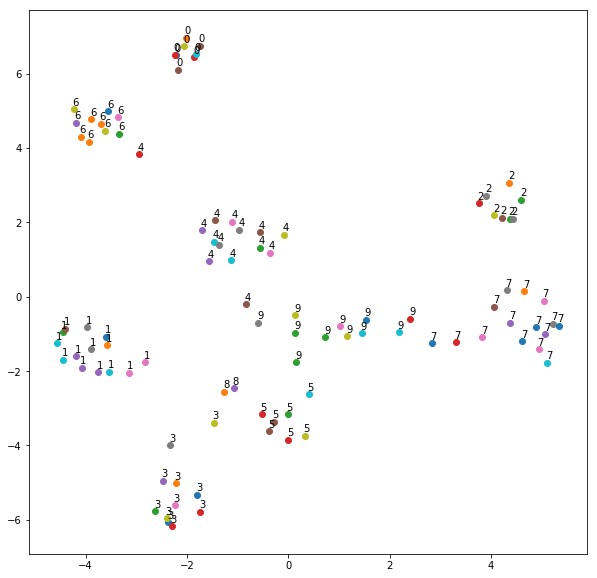

In [8]:
plot_with_labels(lowDWeights,mnist.test.labels[:100] )

# Project all images across epochs

In [9]:
all_weights = pr.parse_all()

In [10]:
epoch_weights = []

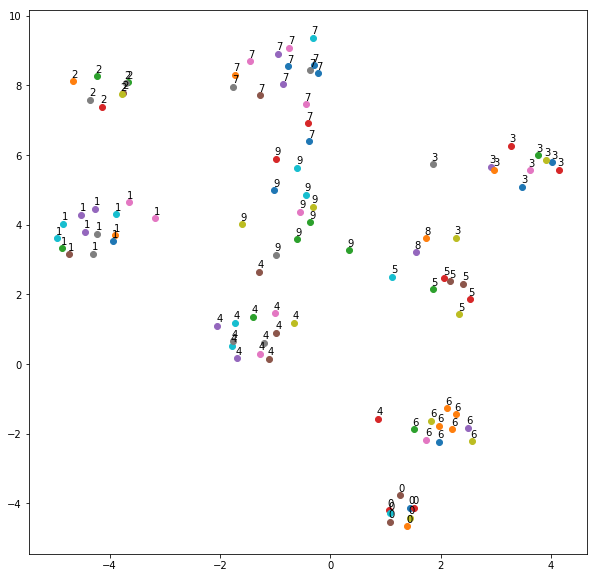

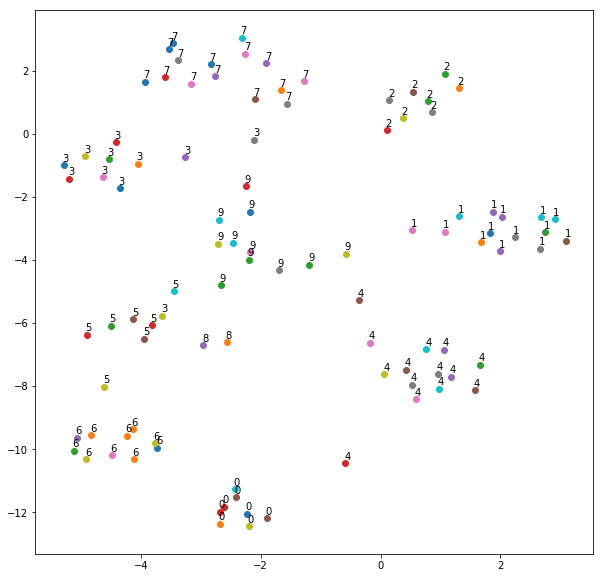

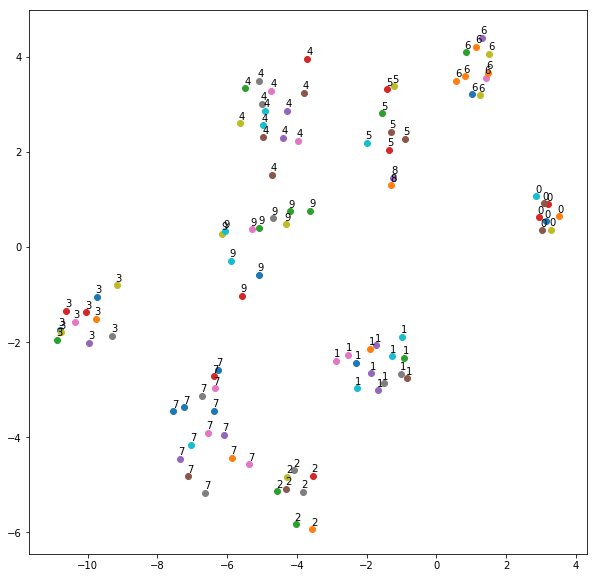

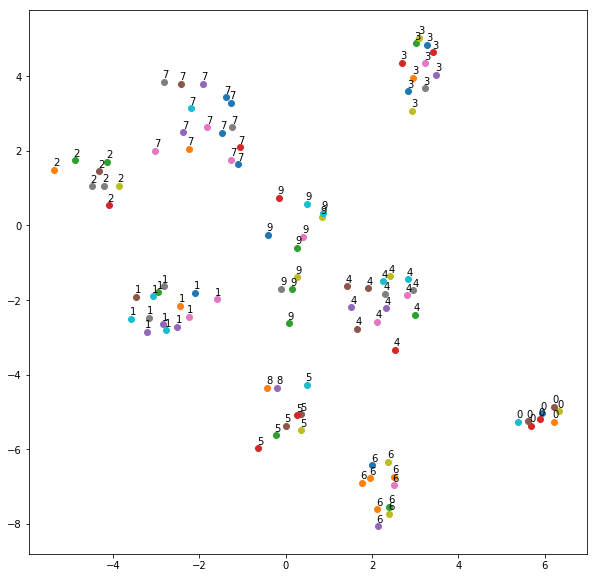

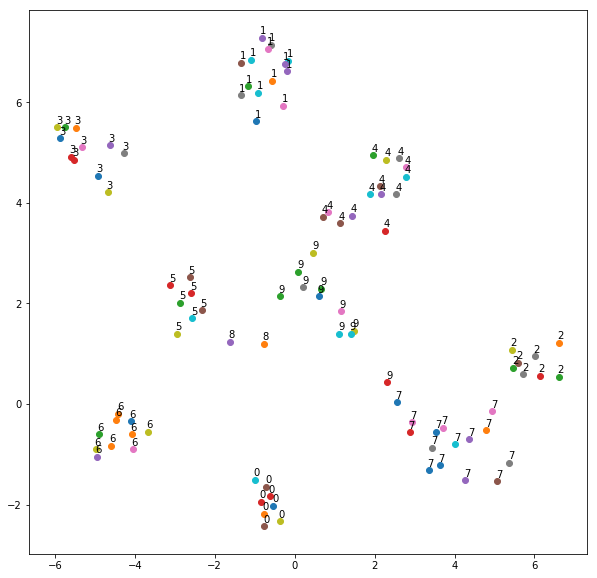

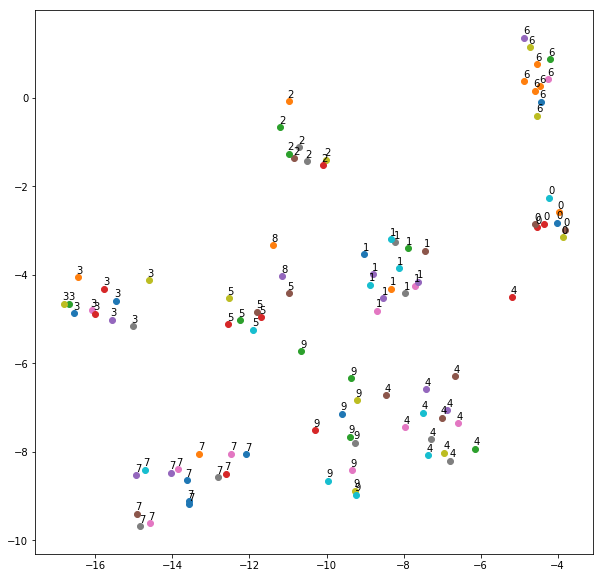

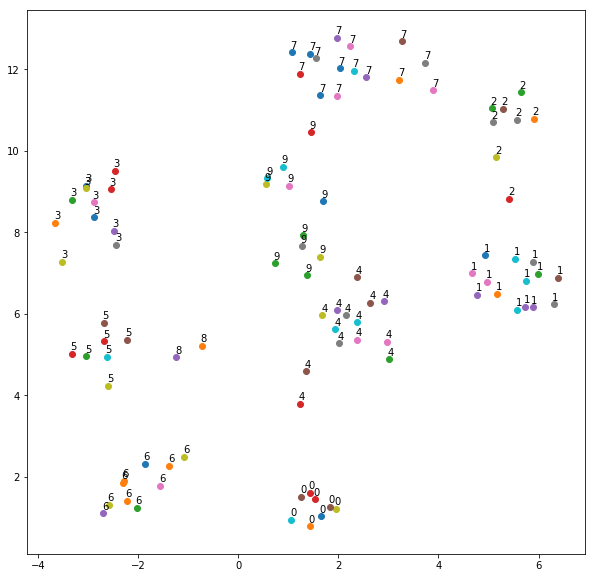

In [26]:
i=0
for w in all_weights:
    tsne = TSNE(perplexity=30, n_components=2, init="pca", n_iter=5000)
    lowDWeights = tsne.fit_transform(w)
    epoch_weights.append(lowDWeights)
    plot_with_labels(lowDWeights, mnist.test.labels[:100], "epoch"+str(i))
    i+=1

In [12]:
#given a list of points, generates a matrix of distances 
def calc_distances(pts_lst): 
    dist_matrix = []
    for i in pts_lst: 
        pts = list(map(lambda x: np.linalg.norm(i-x), pts_lst))
        dist_matrix.append(pts)
    return np.array(dist_matrix)

In [13]:
distances = calc_distances(epoch_weights[0])

In [14]:
def kth_distances(pt_lst,k):
    sorted = np.sort(pt_lst)[1:k+1]
    pts = []
    for i in sorted: 
        pt_index = np.nonzero(pt_lst==i)
        if(len(pt_index)>1): raise Exception("same distances")
        else: pt_index = pt_index[0][0]
        pts.append({"pt":pt_index,"dist":i, "class":mnist.test.labels[pt_index]})
    return pts

In [15]:
print(mnist.test.labels[0])
kth_distances(distances[0], 6)

7


[{'pt': 17, 'dist': 0.37135258, 'class': 7},
 {'pt': 34, 'dist': 0.3999197, 'class': 7},
 {'pt': 70, 'dist': 0.41254526, 'class': 7},
 {'pt': 86, 'dist': 0.51589, 'class': 7},
 {'pt': 64, 'dist': 0.51598454, 'class': 7},
 {'pt': 60, 'dist': 0.5694534, 'class': 7}]

In [16]:
def pt_ratio(nearest, i_label):
    s = 0.0
    for i in nearest: 
        if i["class"]==i_label: s+=1
    return s / len(nearest)

def n_ratio(projs, k):
    distances = calc_distances(projs)#matrix of distances
    sum_ratios = 0.0
    for i in range(len(distances)): 
        nearest = kth_distances(distances[i], k)
        i_label = mnist.test.labels[i]
        sum_ratios += pt_ratio(nearest, i_label)
    return sum_ratios / len(distances)

In [17]:
n_ratio(epoch_weights[0],6)

0.925

In [18]:
epoch_weights[0].shape

(100, 2)

In [25]:
for i in range(len(epoch_weights)):
    print("epoch"+str(i) + ": " +str(n_ratio(epoch_weights[i],6)))

epoch0: 0.925
epoch1: 0.9233333333333333
epoch2: 0.9433333333333331
epoch3: 0.9516666666666665
epoch4: 0.95
epoch5: 0.94
epoch6: 0.9466666666666665
